# Example of Thermostat based on Active Inference
this program is an example of an single agent-based active inference model,.

## Generative process
the _generative process_ consist of an agent that, depending on his 1-D position $x$,
modifies the room temperature in the following manner
$$
T(x) = \frac{ T_0 }{ x^2 + 1 }
$$
with $T_{0}$ temperature at the origin.

The agent is allowed to sense both the local temperature and its temporal derivative. In particular
$$
s = T + z_{s}^{gp} \\
s' = T' + z_{s'}^{gp} = \frac{ \partial T }{ \partial x } \frac{ \partial x }{ \partial t } + z_{s'}^{gp} = - \frac{ 2x T_{0} }{ (x^2+1)^2 } x' + z_{s'}^{gp}
$$
where $z_{s}^{gp}$ and $z_{s'}^{gp}$ are normally distributed noise with zero mean and variances $\Sigma_{s}^{gp}$ and $\Sigma_{s'}^{gp}$
(the gp superscript indicates that is part of the agent's environment described by the generative process and, for the moment, has nothing to do with the brain model).

Finally, the agent is allowed to set its own velocity by setting it equal to the action variable $a$ as
$$ x'=a $$

## Generative model

let's specify the dynamical model of the brain that allows to build a minimization scheme for the VFE, remembering that with the **Laplace approximation**
$$
F \equiv \int Q(T) \ln \frac{Q(T)}{P(T,s)}dx \approx L(\mu,s) \equiv - \ln P(\mu,s)
$$
we are assuming that the brain represents, through the brain state $\mu$, only the most likely environmental cause T of sensory data s.

Let's start assuming that the agent believes that the world's dynamic is given by an exact thermostat dynamic with differential equation
$$
\mu' = f(\mu) + z_{\mu} \text{with} \quad f(\mu) \equiv - \mu + T_{des} \, .
$$
Using the local linearity approximation, the agent will represents up to the second order of $\mu$:
$$
\mu'' = \frac{ \partial f}{ \partial \mu } \mu' + z_{\mu'} \\
\mu''' = z_{\mu''}
$$
Here the third term is specified to explain that, to consider the dynamic up to the second order,
the next order is set equal only to a Gaussian noise with large variance $\Sigma_{\mu''}$ so that it can be effectively eliminated from the VFE expression.

Is important to note that in this formulation the agent does not desire to be at $T_{des}$ (the prior $P(\mu)$ is omitted since is a flat distribution),
but believes in an environment with an equilibrium point at $T_{des}$ that works as attractor.


## Laplace-encoded Energy
Now we can write explicitly the joint density $P(\mu,s)$
$$
P(\tilde{\mu}, \tilde{s}) \simeq P(s|\mu) P(s'|\mu') P(\mu'|\mu) P(\mu''|\mu') = \mathcal{N}(s;\mu,\Sigma_{s}) \mathcal{N}(s';\mu',\Sigma_{s'}) \mathcal{N}(\mu';\mu-T_{des},\Sigma_{\mu}) \mathcal{N}(\mu'';-\mu',\Sigma_{\mu'})
$$
that leads to a Variational Free Energy approximated a the Laplace-encoded Energy
$$
L(\tilde{\mu}, \tilde{s}) = \frac{ 1 }{ 2 } \left[ \frac{ \varepsilon_{s}^2 }{ \Sigma_{s} } + \frac{ \varepsilon_{s'}^2 }{ \Sigma_{s'} } +
\frac{ \varepsilon_{\mu}^2 }{ \Sigma_{\mu} } + \frac{ \varepsilon_{\mu'}^2 }{ \Sigma_{\mu'} } \right] + \frac{ 1 }{ 2 } \ln (\Sigma_{s} \Sigma_{s'} \Sigma_{\mu} \Sigma_{\mu'}) + 2 \ln (2\pi)
$$
with
$$
\begin{aligned}
\varepsilon_{s} &= s-\mu \\
\varepsilon_{s'} &= s'-\mu' \\
\varepsilon_{\mu} &= \mu'+\mu-T_{des} \\
\varepsilon_{\mu'} &= \mu''+\mu'
\end{aligned}
$$

## Gradient descent

In the Active Inference framework, the agent uses a gradient descent scheme to minimize VFE. In particular, the brain state variables $\tilde{\mu}$ will be updated following
$$
\begin{aligned}
\mu(t+dt) &= \mu(t) + \mu'(t) dt - k_{\mu} \frac{ \partial L }{ \partial \mu } = \mu(t) + \mu'(t) dt - k_{\mu} \left[ -\frac{ \varepsilon_s }{ \Sigma_{s} } + \frac{ \varepsilon_{\mu} }{ \Sigma_{\mu} } \right] \\
\mu'(t+dt) &= \mu'(t) + \mu''(t) dt - k_{\mu} \frac{ \partial L }{ \partial \mu' } = \mu'(t) + \mu'(t) dt - k_{\mu} \left[ -\frac{ \varepsilon_{s'} }{ \Sigma_{s'} } + \frac{ \varepsilon_{\mu} }{ \Sigma_{\mu} } + \frac{ \varepsilon_{\mu'} }{ \Sigma_{\mu'} } \right] \\
\mu''(t+dt) &= \mu''(t) - k_{\mu} \frac{ \partial L }{ \partial \mu'' } = \mu''(t) - k_{\mu} \left[ \frac{ \varepsilon_{\mu'} }{ \Sigma_{\mu'} } \right]
\end{aligned}
$$
with the $k_{\mu}$ parameter to be tuned.

## Action
To perform an action the agent has to minimize, always through a gradient denscent, the VFE with respect to the action variable, that in this case is equal to $x'$ since the agent is allowed to set is own velocity.

Here we are assuming that the agent has also an inverse model that allows it to know the effects of its actions on the sensory imputs (i.e. it knows that $\mu(x) = \frac{ T_0 }{ x^2 +1 }$ and $\mu'(x,x')=\frac{ d\mu }{ dx } x' = -T_0\frac{ 2x }{ (x^2+1)^2 } x'$ )
$$
\begin{aligned}
\frac{ ds }{ da } &= \frac{ ds }{ dx' } = \frac{ d }{ dx' } (\mu + z_{\mu}) = 0 \\
\frac{ ds' }{ da } &= \frac{ ds' }{ dx' } = \frac{ d }{ dx' } (\mu' + z_{\mu'}) = \frac{ d\mu' }{ dx' } = -T_0\frac{ 2x }{ (x^2+1)^2 }
\end{aligned}
$$
Using this inverse model the gradient descent with restpec to action will be
$$
x'(t+dt) = x'(t) - k_{a} \left[ \frac{ \partial F }{ \partial x' } \right] = x'(t) - k_{a} \left[ \frac{ \partial F }{ \partial s' } \frac{ \partial s' }{ dx' } \right] = x'(t) - k_{a} \left[ \frac{ \varepsilon_{s'} }{ \Sigma_{s'} } (-T_0\frac{ 2x }{ (x^2+1)^2 }) \right]
$$


# Code


## Functions

In [1]:
# Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



## Classes

In [26]:
# Generative process class
class GenProc:
    def __init__(self, rng, x):

        # Generative process parameters
        self.SigmaGP_s = 0.1                        # Generative process s variance
        self.SigmaGP_s1 = 0.1                       # Generative process s'
        self.T0 = 100                               # Startup temperature

        self.rng = rng                              # np.random.RandomState
        self.x = x                                  # Two dimensional array storing agent position and velocity

    def T(self):                                    # System temperature
        return self.T0/(self.x[0]**2+1)

    def T1(self):                                   # System temperature "velocity"
        Tx = -2*self.T0*self.x[0]/((self.x[0]**1+1)**2)
        return Tx*self.x[1]

    def genS(self):                                 # Function that create agent's sensory input (two dimensional array)
        s = np.zeros(2)
        s[0] = self.SigmaGP_s*self.rng.randn() + self.T()
        s[1] = self.SigmaGP_s1*self.rng.randn() + self.T1()
        return s

    def dynamic(self, dt):                             # Step of generative process dynamic
        self.x[0] += dt*self.x[1]

# Generative model class
class GenMod:
    def __init__(self, rng, dt, a, mu, s):

        self.s = s                                  # Two dimensional array storing sensory input s and s'
        self.a = a                                  # Action variable
        self.mu = mu                                # Tree dimensional array storing brain state variables mu, mu' and mu''

        # Generative model parameters
        self.Td = 4                                 # Desired temperature
        self.actionTime= 25                         # Variable that enable action only after a fixed amount of time
        self.Sigma_s = 0.1                          # Generative model s variance (in this case we're assuming the agent knows gp variace)
        self.Sigma_s1 = 0.1                         # Generative model s' variance (in this case we're assuming the agent knows gp variace)
        self.Sigma_mu = 0.1                         # Generative model $\mu$ variance
        self.Sigma_mu1 = 0.1                        # Generative model $\mu'$ variance
        self.k_mu = 0.1*dt                          # Gradient descent inference parameter
        self.k_a = 0.01*dt                          # Gradient descent action parameter

    def f(self):                                    # f(mu) dynamics generative model
        return -self.mu[0]+self.Td

    def VFE(self):                                  # Variational Free Energy
        epsilon_s = self.s[0] - self.mu[0]
        epsilon_s1 = self.s[1] - self.mu[1]
        epsilon_mu = self.mu[1] - self.f()
        epsilon_mu1 = self.mu[2] + self.mu[1]
        return 1/2*( espilon_s**2/self.Sigma_s + espilon_s1**2/self.Sigma_s1 + espilon_mu**2/self.Sigma_mu + espilon_mu1**2/self.Sigma_mu1 )

    def update(self, dt, step, x, T0):
        epsilon_s = self.s[0] - self.mu[0]
        epsilon_s1 = self.s[1] - self.mu[1]
        epsilon_mu = self.mu[1] - self.f()
        epsilon_mu1 = self.mu[2] + self.mu[1]
        self.mu[0] += dt*self.mu[1] - self.k_mu*( - epsilon_s/self.Sigma_s + epsilon_mu/self.Sigma_mu )
        self.mu[1] += dt*self.mu[2] - self.k_mu*( - epsilon_s1/self.Sigma_s1 + epsilon_mu/self.Sigma_mu + epsilon_mu1/self.Sigma_mu1)
        self.mu[2] += - self.k_mu*( epsilon_mu1/self.Sigma_mu1 )
        if self.actionTime<=step*dt:
            #Tx = -1                                # To try if you want to give a less precise inverse modet to the agent
            Tx = -2*T0*x/((x**2+1)**2)
            self.a += -self.k_a*Tx*epsilon_s1/self.Sigma_s1

# Plotter class
class Plotter:

    def __init__(self, len_data):
        self.fig = plt.figure(figsize=(12, 8))
        self.ax = self.fig.add_subplot(111)
        #self.line, = self.ax.plot(0, 0, lw=3, c="black")
        self.eq, = self.ax.plot(0, 0)
        self.x = np.zeros(len_data)
        self.y = np.zeros(len_data)
        #self.eq, = self.ax.plot(self.x, self.y)

    def update_data(self, i, x, y):
        self.x[i] = x
        self.y[i] = y

    def update_plot(self, i):

        self.eq.set_data(self.x[:i+1], self.y[i+1])
        #self.ax.set_xlim(self.x[0], self.x[-1])
        #self.ax.set_ylim(self.y[0], self.y[-1])
        self.fig.canvas.draw()



## Simulation

In [27]:
if __name__ == "__main__":
    simT = 100                                      # Simulation Time
    dt = 0.005                                      # Time step lenght
    steps = int(simT/dt)                            # Time step number
    action = True                                   # Variable to enable action
    rng = np.random.RandomState(42)
    gp = GenProc( rng, x=np.zeros(2) )              # Initialising generative process
    gp.x[0] = 2                                     # Agent starting point
    gm = GenMod( rng, dt, s=np.zeros(2), mu=np.zeros(3), a=0 )
                                                    # Initialasing generative model

    #TvsSteps = Plotter(steps)                       # Initialasing Temperature dynamic plot
    #TvsSteps.update(0, )
    T = np.array([gp.T()])
    pos = np.array([gp.x[0]])
    act = np.array([gm.a])
    for i in range(1,steps):
        #print(i),
        gp.x[1] = gm.a                              # Agent's action (set its own velocity)
        gp.dynamic(dt)                              # The environment evolves following the dynamic given by x and x'
        gm.s = gp.genS()                            # The generative process creates noisy sensory input that are percevied by the generative model
        gm.update(dt, i, gp.x[0], gp.T0)            # The generative model update internal states mu, mu' and mu'' computing the dynamic,
                                                    # and taking the VFE gradient descent (every step of the gradient descent is simultaneous with the internal
                                                    # model updating step, that is an assumpion)
        #TvsSteps.get_data(i*dt, gp.T())                  # Updating Temperature dynamic plot
        T = np.append(T,np.array(gp.T()))
        pos = np.append(pos,gp.x[0])
        act = np.append(act,gm.a)
    #TvsSteps.plt.show()


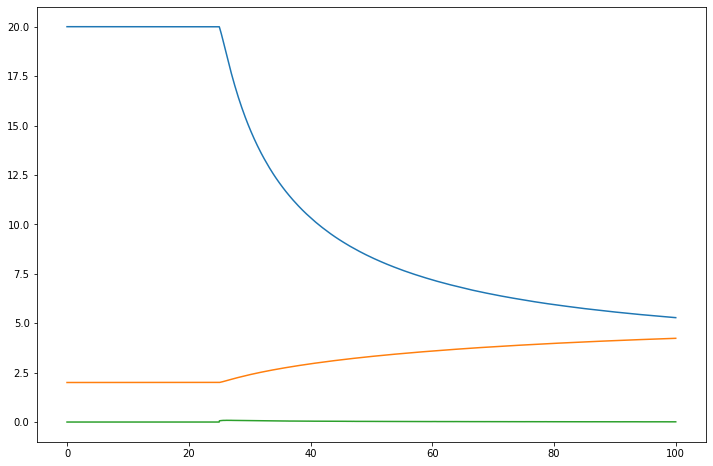

In [28]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
temp, = ax.plot(np.arange(steps)*dt, T)
position, = ax.plot(np.arange(steps)*dt, pos)
action, = ax.plot(np.arange(steps)*dt, act)
#fig.canvas.draw()